# Loading Data

The first step is to load all of the required libraries

In [1]:
# Import libraries for use on .wav files
import wave
import struct

# Import libraries for file management, locating and loading data.
import fnmatch
import os

# Pandas for data storage during processing
import pandas as pd

# location of the samples to be used
directory = './heartbeat-sounds/set_a/'

Next iterate over the files in the selected location an load the normal heartbeat data
displaying the name of each file as its loaded to check against the files in the location

In [2]:
# Instatiate a dataframe to store multiple samples
normal_df = pd.DataFrame()

# iterate over all of the files in the specified folder and 
# load the normal data set
for filename in os.listdir(directory):
    if filename.endswith(".wav") and fnmatch.fnmatch(filename, '*normal*'):
        # Get full filename by concatenating the path and filename, print out to indicate file will be loaded
        FNAME = os.path.join(directory, filename)
        print(FNAME)
        
        # Load file and unpack the samples
        f = wave.open(FNAME)
        frames = f.readframes(-1)
        samples = struct.unpack('h'*f.getnframes(), frames)
        
        # convert the samples to a list and then store in the dataframe
        temp_df = pd.DataFrame(list(samples))
        normal_df = normal_df.append(temp_df.T,ignore_index=True)
        
        continue
    else:
        # ignore files that do not match specified criteria
        continue

./heartbeat-sounds/set_a/normal__201101070538.wav
./heartbeat-sounds/set_a/normal__201101151127.wav
./heartbeat-sounds/set_a/normal__201102081152.wav
./heartbeat-sounds/set_a/normal__201102081321.wav
./heartbeat-sounds/set_a/normal__201102201230.wav
./heartbeat-sounds/set_a/normal__201102260502.wav
./heartbeat-sounds/set_a/normal__201102270940.wav
./heartbeat-sounds/set_a/normal__201103090635.wav
./heartbeat-sounds/set_a/normal__201103101140.wav
./heartbeat-sounds/set_a/normal__201103140132.wav
./heartbeat-sounds/set_a/normal__201103140135.wav
./heartbeat-sounds/set_a/normal__201103140822.wav
./heartbeat-sounds/set_a/normal__201103151912.wav
./heartbeat-sounds/set_a/normal__201103170121.wav
./heartbeat-sounds/set_a/normal__201103221214.wav
./heartbeat-sounds/set_a/normal__201104122156.wav
./heartbeat-sounds/set_a/normal__201104141251.wav
./heartbeat-sounds/set_a/normal__201105011626.wav
./heartbeat-sounds/set_a/normal__201105021654.wav
./heartbeat-sounds/set_a/normal__201105021804.wav


Now I can have a look at the data, this shows that 31 samples have been loaded.
It also shows that the samples are of varying length with the longest 396900 data points, however there are alot of NaN values in the later columns

In [3]:
normal_df

,0,1,2,3,4,5,6,7,8,9,...,396890,396891,396892,396893,396894,396895,396896,396897,396898,396899
0,14,17,14,0,2,11,-2,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1342,1374,1368,1348,1364,1370,1347,1372,1359,1446,...,-3008.0,-3021.0,-3047.0,-3073.0,-3138.0,-3175.0,-3160.0,-3194.0,-3239.0,-3258.0
2,150,152,203,151,114,129,202,233,150,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,285,270,275,196,150,83,72,-3,-47,-99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,11,5,7,-24,-4,-10,-1,1,-4,...,-12.0,1.0,-2.0,0.0,-2.0,6.0,-4.0,1.0,3.0,3.0
5,-462,-460,-479,-480,-495,-495,-498,-504,-498,-509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-25,-28,-26,-24,-16,2,7,7,8,12,...,-12.0,-15.0,-8.0,-18.0,-29.0,-24.0,-17.0,-12.0,-17.0,-14.0
7,12,31,10,-1,17,29,31,18,32,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-2,-3,5,-3,0,1,-3,0,-2,-4,...,1912.0,1922.0,1933.0,1940.0,1940.0,1940.0,1950.0,1948.0,1963.0,1966.0
9,4,8,-1,0,-7,1,-3,-3,-3,-2,...,-38.0,-39.0,-37.0,-39.0,-32.0,-40.0,-36.0,-32.0,-22.0,-10.0


Repeat the same steps for the murmur data

In [4]:
# Instatiate a dataframe to store multiple samples
murmur_df = pd.DataFrame()
# iterate over all of the files in the specified folder and 
# load the murmur data set
for filename in os.listdir(directory):
    if filename.endswith(".wav") and fnmatch.fnmatch(filename, '*murmur*'):
        # Get full filename by concatenating the path and filename, print out to indicate file will be loaded
        FNAME = os.path.join(directory, filename)
        print(FNAME)
        
        # Load file and unpack the samples
        f = wave.open(FNAME)
        frames = f.readframes(-1)
        samples = struct.unpack('h'*f.getnframes(), frames)
        
        # convert the samples to a list and then store in the dataframe
        temp_df = pd.DataFrame(list(samples))
        murmur_df = murmur_df.append(temp_df.T,ignore_index=True)
        continue
    else:
        # ignore files that do not match specified criteria
        continue

./heartbeat-sounds/set_a/murmur__201101051104.wav
./heartbeat-sounds/set_a/murmur__201101051108.wav
./heartbeat-sounds/set_a/murmur__201101051114.wav
./heartbeat-sounds/set_a/murmur__201101180902.wav
./heartbeat-sounds/set_a/murmur__201102051443.wav
./heartbeat-sounds/set_a/murmur__201102052338.wav
./heartbeat-sounds/set_a/murmur__201103291548.wav
./heartbeat-sounds/set_a/murmur__201104021355.wav
./heartbeat-sounds/set_a/murmur__201104241315.wav
./heartbeat-sounds/set_a/murmur__201104291843.wav
./heartbeat-sounds/set_a/murmur__201106141148.wav
./heartbeat-sounds/set_a/murmur__201108222221.wav
./heartbeat-sounds/set_a/murmur__201108222223.wav
./heartbeat-sounds/set_a/murmur__201108222224.wav
./heartbeat-sounds/set_a/murmur__201108222226.wav
./heartbeat-sounds/set_a/murmur__201108222227.wav
./heartbeat-sounds/set_a/murmur__201108222231.wav
./heartbeat-sounds/set_a/murmur__201108222232.wav
./heartbeat-sounds/set_a/murmur__201108222233.wav
./heartbeat-sounds/set_a/murmur__201108222235.wav


In [5]:
murmur_df

,0,1,2,3,4,5,6,7,8,9,...,396890,396891,396892,396893,396894,396895,396896,396897,396898,396899
0,-241,-230,-226,-223,-208,-205,-197,-185,-183,-177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-85,-100,-88,-92,-107,-96,-103,-99,-99,-99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1693,1663,1642,1628,1573,1552,1553,1498,1504,1547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1944,-1931,-1928,-1905,-1905,-1894,-1885,-1887,-1867,-1874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62,41,70,34,14,-59,-67,-96,-101,-130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,366,359,356,340,335,337,338,354,357,351,...,2090.0,2090.0,2074.0,2057.0,2038.0,2027.0,2000.0,1986.0,1974.0,1959.0
6,4546,4542,4541,4544,4544,4547,4544,4536,4538,4539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-26,-31,-32,-19,15,20,2,-13,-8,-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-20,-3,6,21,13,60,81,84,80,102,...,258.0,269.0,239.0,240.0,236.0,223.0,213.0,197.0,180.0,154.0
9,52,42,27,23,4,-1,-5,32,58,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to get a more accurate pca the data must be combined, I have the size of each set to seperate them again aferwards

In [6]:
AllData_df = pd.DataFrame(normal_df)
AllData_df = AllData_df.append(murmur_df,ignore_index=True)
print AllData_df

    0       1       2       3       4       5       6       7       8       \
0       14      17      14       0       2      11      -2       5       5   
1     1342    1374    1368    1348    1364    1370    1347    1372    1359   
2      150     152     203     151     114     129     202     233     150   
3      285     270     275     196     150      83      72      -3     -47   
4       10      11       5       7     -24      -4     -10      -1       1   
5     -462    -460    -479    -480    -495    -495    -498    -504    -498   
6      -25     -28     -26     -24     -16       2       7       7       8   
7       12      31      10      -1      17      29      31      18      32   
8       -2      -3       5      -3       0       1      -3       0      -2   
9        4       8      -1       0      -7       1      -3      -3      -3   
10       3       6       5       2       5       5       4      10      -1   
11      -1       6      11      22      34      21      33      

Check the sape of the combined data, has 34 + 31 = 65 rows
Print the head and tail of the new dataframe to check against the seperate frames and ensure the order is as expected

In [7]:
print AllData_df.shape

(65, 396900)


In [8]:
AllData_df.head()

,0,1,2,3,4,5,6,7,8,9,...,396890,396891,396892,396893,396894,396895,396896,396897,396898,396899
0,14,17,14,0,2,11,-2,5,5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1342,1374,1368,1348,1364,1370,1347,1372,1359,1446,...,-3008.0,-3021.0,-3047.0,-3073.0,-3138.0,-3175.0,-3160.0,-3194.0,-3239.0,-3258.0
2,150,152,203,151,114,129,202,233,150,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,285,270,275,196,150,83,72,-3,-47,-99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,11,5,7,-24,-4,-10,-1,1,-4,...,-12.0,1.0,-2.0,0.0,-2.0,6.0,-4.0,1.0,3.0,3.0


In [9]:
AllData_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,396890,396891,396892,396893,396894,396895,396896,396897,396898,396899
60,4933,5293,5569,5763,5867,5911,5871,5797,5674,5541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,-7345,-7876,-8281,-8557,-8711,-8755,-8697,-8566,-8378,-8163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,180,192,200,217,213,227,219,227,221,223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,-4458,-4782,-5035,-5205,-5304,-5337,-5307,-5236,-5129,-5005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,465,501,522,543,550,551,546,534,519,504,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now I plot some of the data to be able to compare before and after filtering

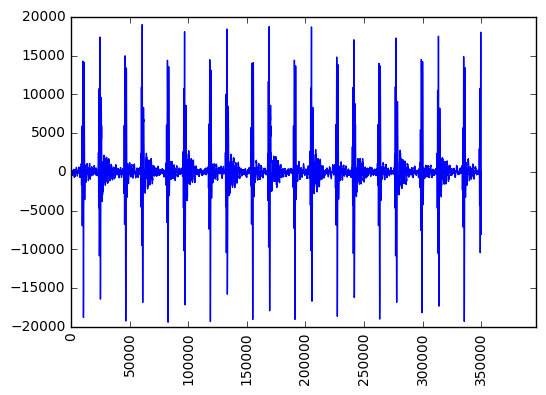

In [10]:
import matplotlib.pyplot as plt
row = AllData_df.iloc[44]
row.plot()
plt.xticks(rotation='vertical')
plt.show()


Subplots give a better view with a comparison of multiple signals. The top row shows three files identified as Murmer and the bottom three that are Normal.

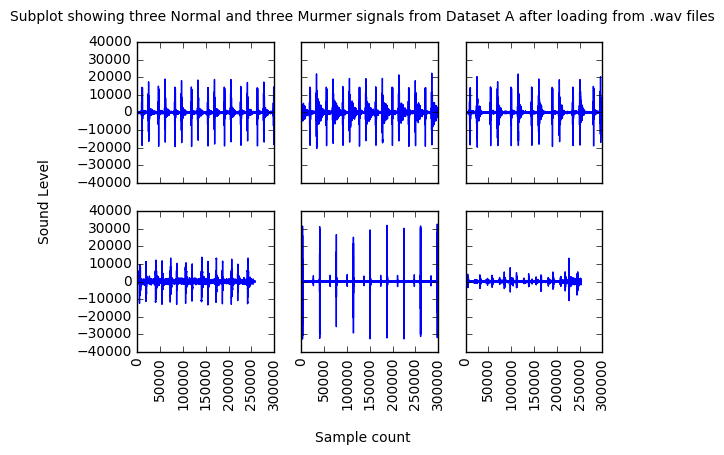

In [12]:
fig, ax = plt.subplots(2, 3)

for i in range(2): 
    for j in range(3): 
        ax[i][j].set_xlim(0, 300000)
        ax[i][j].set_ylim(-40000, 40000) 

plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 2]], visible=False)
plt.setp([a.get_xticklabels() for a in ax[1, :]], rotation='vertical')

ax[0][0].plot(AllData_df.iloc[44])
ax[0][1].plot(AllData_df.iloc[43])
ax[0][2].plot(AllData_df.iloc[42])

ax[1][0].plot(AllData_df.iloc[24])
ax[1][1].plot(AllData_df.iloc[23])
ax[1][2].plot(AllData_df.iloc[22])

#plt.tight_layout()
#fig.savefig('Dataset A after Loading')

fig.text(0.5, -0.1, 'Sample count', ha='center')
fig.text(-0.04, 0.5, 'Sound Level', va='center', rotation='vertical')
fig.suptitle('Subplot showing three Normal and three Murmer signals from Dataset A after loading from .wav files')

plt.show()

The subplot shows the variation in length in the bottom right plot, to enure that as many of the samples can be used as possible and as PCA cannot be completed with NaN values some of the data is discarded. The number of samples is reduced to 132,300 which is equivalent to 3s at 44.1kHz sampling (44100 samples/sec). This means all of the smples other than 38 are free of NaN values and will be included in th PCA

In [13]:
reduced_df = pd.DataFrame()
y = pd.DataFrame()

y = AllData_df.T[:132300]
reduced_df = y.T
    
print reduced_df

     0        1        2        3        4        5        6        7       \
0      14.0     17.0     14.0      0.0      2.0     11.0     -2.0      5.0   
1    1342.0   1374.0   1368.0   1348.0   1364.0   1370.0   1347.0   1372.0   
2     150.0    152.0    203.0    151.0    114.0    129.0    202.0    233.0   
3     285.0    270.0    275.0    196.0    150.0     83.0     72.0     -3.0   
4      10.0     11.0      5.0      7.0    -24.0     -4.0    -10.0     -1.0   
5    -462.0   -460.0   -479.0   -480.0   -495.0   -495.0   -498.0   -504.0   
6     -25.0    -28.0    -26.0    -24.0    -16.0      2.0      7.0      7.0   
7      12.0     31.0     10.0     -1.0     17.0     29.0     31.0     18.0   
8      -2.0     -3.0      5.0     -3.0      0.0      1.0     -3.0      0.0   
9       4.0      8.0     -1.0      0.0     -7.0      1.0     -3.0     -3.0   
10      3.0      6.0      5.0      2.0      5.0      5.0      4.0     10.0   
11     -1.0      6.0     11.0     22.0     34.0     21.0     33.

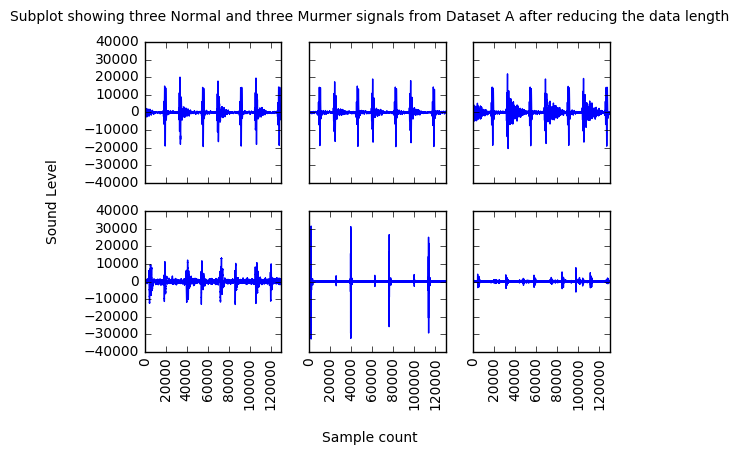

In [64]:
fig, ax = plt.subplots(2, 3)

for i in range(2): 
    for j in range(3): 
        ax[i][j].set_xlim(0, 130000)
        ax[i][j].set_ylim(-40000, 40000) 

plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 2]], visible=False)
plt.setp([a.get_xticklabels() for a in ax[1, :]], rotation='vertical')

ax[0][0].plot(reduced_df.iloc[44])
ax[0][1].plot(reduced_df.iloc[43])
ax[0][2].plot(reduced_df.iloc[42])

ax[1][0].plot(reduced_df.iloc[24])
ax[1][1].plot(reduced_df.iloc[23])
ax[1][2].plot(reduced_df.iloc[22])

#plt.tight_layout()
#fig.savefig('Dataset A after Reducing Length')

fig.text(0.5, -0.1, 'Sample count', ha='center')
fig.text(-0.04, 0.5, 'Sound Level', va='center', rotation='vertical')
fig.suptitle('Subplot showing three Normal and three Murmer signals from Dataset A after reducing the data length')

plt.show()

In [16]:
reduced_df = reduced_df.dropna()
reduced_df.isnull().values.any()

False

In [17]:
print reduced_df.shape

(64, 132300)


In [18]:
print reduced_df

     0        1        2        3        4        5        6        7       \
0      14.0     17.0     14.0      0.0      2.0     11.0     -2.0      5.0   
1    1342.0   1374.0   1368.0   1348.0   1364.0   1370.0   1347.0   1372.0   
2     150.0    152.0    203.0    151.0    114.0    129.0    202.0    233.0   
3     285.0    270.0    275.0    196.0    150.0     83.0     72.0     -3.0   
4      10.0     11.0      5.0      7.0    -24.0     -4.0    -10.0     -1.0   
5    -462.0   -460.0   -479.0   -480.0   -495.0   -495.0   -498.0   -504.0   
6     -25.0    -28.0    -26.0    -24.0    -16.0      2.0      7.0      7.0   
7      12.0     31.0     10.0     -1.0     17.0     29.0     31.0     18.0   
8      -2.0     -3.0      5.0     -3.0      0.0      1.0     -3.0      0.0   
9       4.0      8.0     -1.0      0.0     -7.0      1.0     -3.0     -3.0   
10      3.0      6.0      5.0      2.0      5.0      5.0      4.0     10.0   
11     -1.0      6.0     11.0     22.0     34.0     21.0     33.

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(reduced_df)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

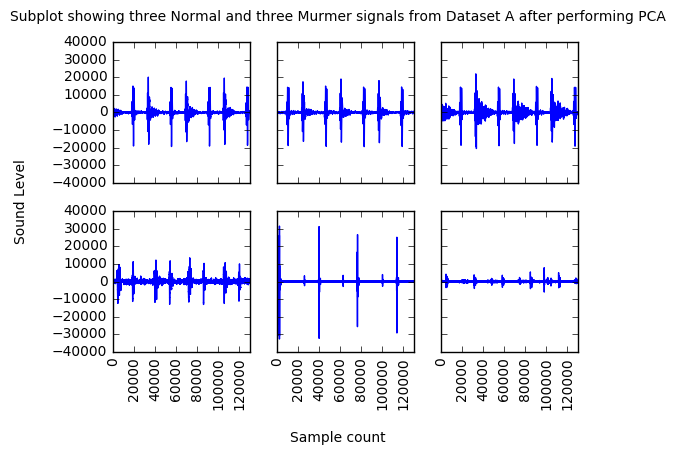

In [22]:
fig, ax = plt.subplots(2, 3)
for i in range(2): 
    for j in range(3): 
        ax[i][j].set_xlim(0, 130000)
        ax[i][j].set_ylim(-40000, 40000) 

plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 2]], visible=False)
plt.setp([a.get_xticklabels() for a in ax[1, :]], rotation='vertical')

ax[0][0].plot(reduced_df.iloc[44])
ax[0][1].plot(reduced_df.iloc[43])
ax[0][2].plot(reduced_df.iloc[42])

ax[1][0].plot(reduced_df.iloc[24])
ax[1][1].plot(reduced_df.iloc[23])
ax[1][2].plot(reduced_df.iloc[22])

#plt.tight_layout()
#fig.savefig('Dataset A after PCA')

fig.text(0.5, -0.1, 'Sample count', ha='center')
fig.text(-0.04, 0.5, 'Sound Level', va='center', rotation='vertical')
fig.suptitle('Subplot showing three Normal and three Murmer signals from Dataset A after performing PCA')



plt.show()

In [37]:
from scipy.signal import butter, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

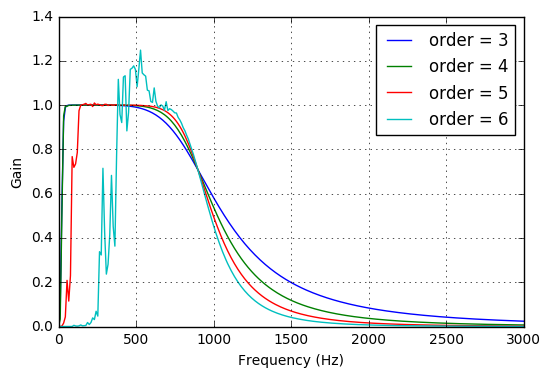

In [38]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 44100.0
lowcut = 25.0
highcut = 900.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3,4,5,6]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)


plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')
plt.xlim(0, 3000)
plt.show()

In [39]:
y = butter_bandpass_filter(reduced_df,lowcut, highcut, fs, order=4)


In [40]:
filtered_df = pd.DataFrame(y)
print filtered_df

      0         1          2          3          4           5       \
0   0.000180  0.001604   0.007116   0.021319   0.049249    0.094977   
1   0.017302  0.150463   0.657138   1.967672   4.631662    9.253078   
2   0.001934  0.016797   0.073940   0.224301   0.534505    1.075661   
3   0.003674  0.031673   0.137200   0.406996   0.945966    1.856842   
4   0.000129  0.001131   0.004905   0.014395   0.032560    0.060712   
5  -0.005956 -0.051631  -0.225044  -0.673513  -1.586828   -3.176498   
6  -0.000322 -0.002834  -0.012486  -0.037594  -0.088573   -0.175895   
7   0.000155  0.001587   0.007698   0.024228   0.057468    0.113144   
8  -0.000026 -0.000237  -0.000983  -0.002606  -0.005255   -0.008978   
9   0.000052  0.000499   0.002279   0.006776   0.015140    0.027694   
10  0.000039  0.000374   0.001784   0.005677   0.013843    0.028157   
11 -0.000013 -0.000022   0.000360   0.002655   0.010587    0.030925   
12  0.007207  0.062128   0.269115   0.799965   1.871288    3.718136   
13 -0.

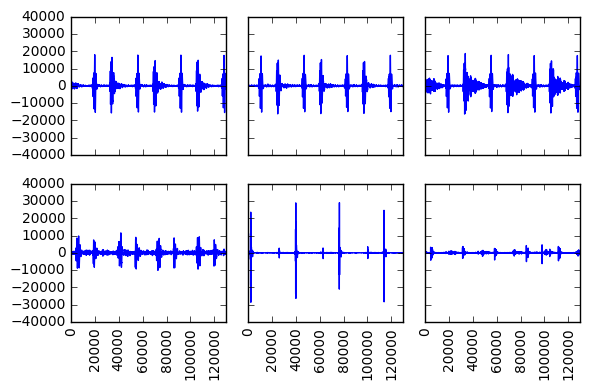

In [67]:
fig, ax = plt.subplots(2, 3)

for i in range(2): 
    for j in range(3): 
        ax[i][j].set_xlim(0, 130000)
        ax[i][j].set_ylim(-40000, 40000) 

plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 1]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[:, 2]], visible=False)
plt.setp([a.get_xticklabels() for a in ax[1, :]], rotation='vertical')

ax[0][0].plot(filtered_df.iloc[44])
ax[0][1].plot(filtered_df.iloc[43])
ax[0][2].plot(filtered_df.iloc[42])

ax[1][0].plot(filtered_df.iloc[24])
ax[1][1].plot(filtered_df.iloc[23])
ax[1][2].plot(filtered_df.iloc[22])

plt.tight_layout()
fig.savefig('Dataset A after Filtering')


plt.show()

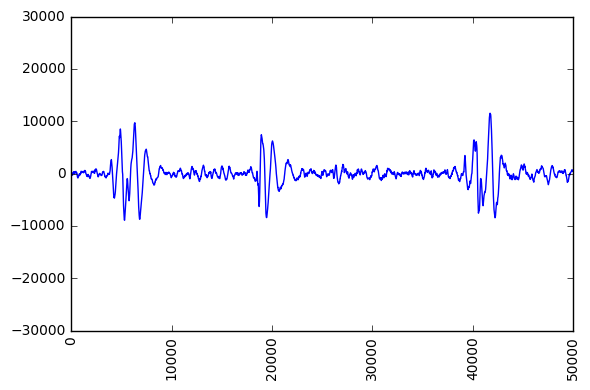

In [66]:
row = filtered_df.iloc[24]
row.plot()
plt.xticks(rotation='vertical')
plt.xlim(0, 50000)
plt.ylim(-30000, 30000) 

plt.tight_layout()
plt.savefig('Dataset A Normal after Filtering')

plt.show()

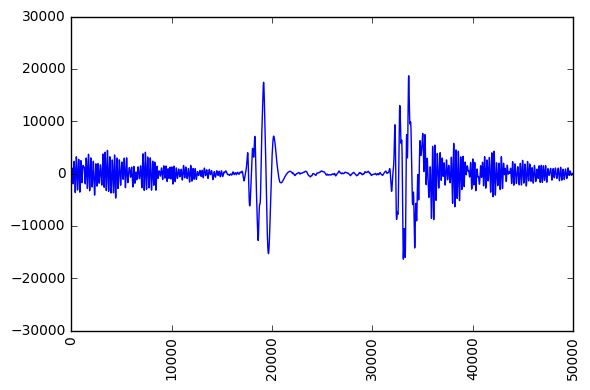

In [65]:
row = filtered_df.iloc[42]
row.plot()
plt.xticks(rotation='vertical')
plt.xlim(0, 50000)
plt.ylim(-30000, 30000) 

plt.tight_layout()
plt.savefig('Dataset A Murmur after Filtering')

plt.show()